<a href="https://colab.research.google.com/github/jlvoltan/bootcamp_python/blob/master/jlvoltan_desafio_modulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de dados - jlvoltan

* O trabalho consiste em uma análise dos dados sobre as bicicletas compartilhadas, os dados foram coletados pela Universidade do Porto.
* No exercicio proposto no bootcamp, foi informado apenas o dataset, e o aluno deveria desenvolver seu código para responder algumas perguntas

In [32]:
#Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carregando os dados

In [14]:
df = pd.read_csv("https://pycourse.s3.amazonaws.com/bike-sharing.csv")

### Descritivo dos dados coletados:

- rec_id: índice do registro de locação;
- datetime : data;
- season : estação do ano (1: inverno, 2: primevera, 3: verão, 4: outono). Relativo ao
hemisfério norte;
- year : ano (0: 2011, 1:2012);- month : mês (1 a 12);
- hour : hora do dia (0 a 23);
- is_holiday : booleano indicando feriado;
- weekday : dia da semana (0: domingo, 1: segunda-feira, …, 6: sábado);
- is_workingday : booleano indicando dia útil;
- weather_condition: (1: limpo, 2: nublado, 3: chuva leve, 4: chuva forte);
- temp : Temperatura escalada entre 0 e 1. Valor original em graus Celsius: -8 a 39;
- atemp: Sensação térmica escalada entre 0 e 1. Valor original em graus Celsius: -16 a 50;
- humidity: Humidade relativa (0 a 1);
- windspeed: Velocidade do vento escalada entre 0 e 1 (máximo original: 67);
- casual: número de locações para usuários casuais;
- registered: número de locações para usuários registrados;
- total_count: contador total de aluguéis (casual+registered).


## Análise inicial

In [15]:
#Exibe as 3 primeiras linhas do data frame
df.head(3)

,datetime,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [16]:
#Exibe as 3 últimas linhas
df.tail(3)

,datetime,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
17376,2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,2012-12-31,17379,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [17]:
 print("Tamanho do dataset::{}".format(df.shape))

Tamanho do dataset::(17379, 17)


In [18]:
# Vendo os tipos de dados
df.dtypes

datetime              object
rec_id                 int64
season                 int64
year                   int64
month                  int64
hour                   int64
is_holiday             int64
weekday                int64
is_workingday          int64
weather_condition      int64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
total_count            int64
dtype: object

* Observe que a data (datetime) aparece como object e não como datetime

In [19]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [20]:
#Estatísticas básicas
df.describe()

,rec_id,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           17379 non-null  datetime64[ns]
 1   rec_id             17379 non-null  int64         
 2   season             17379 non-null  int64         
 3   year               17379 non-null  int64         
 4   month              17379 non-null  int64         
 5   hour               17379 non-null  int64         
 6   is_holiday         17379 non-null  int64         
 7   weekday            17379 non-null  int64         
 8   is_workingday      17379 non-null  int64         
 9   weather_condition  17379 non-null  int64         
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

### Registros de locações existem para o ano de 2011 e para 2012

* Lembrar da descrição do dado, que no 0: 2011 enquanto 1:2012
* A quantidade de colunas não muda.

In [25]:
df['year'].value_counts()

1    8734
0    8645
Name: year, dtype: int64

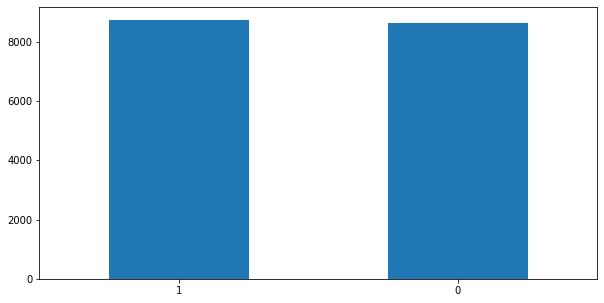

In [36]:
#Em gráfico de barras
df['year'].value_counts().plot.bar(figsize=(10,5), rot=0);

### Total de locações em 2011 e *2012*
* total_count

In [40]:
#Criando um novo dataframe através da subdivisão do dataframe atual.
total = df[df['year']==0]
valor_2011 = total['total_count'].sum()
print("O total de locações em 2011 foi: "+ str(valor_2011)) 

total2 = df[df['year']==1]
valor_2012 = total2['total_count'].sum()
print("O total de locações em 2012 foi: "+ str(valor_2012)) 

O total de locações em 2011 foi: 1243103
O total de locações em 2012 foi: 2049576


### Estação com maior média de locações
- season : estação do ano (1: inverno, 2: primevera, 3: verão, 4: outono). 
* total_count

        total_count
season             
1        111.114569
2        208.344069
3        236.016237
4        198.868856


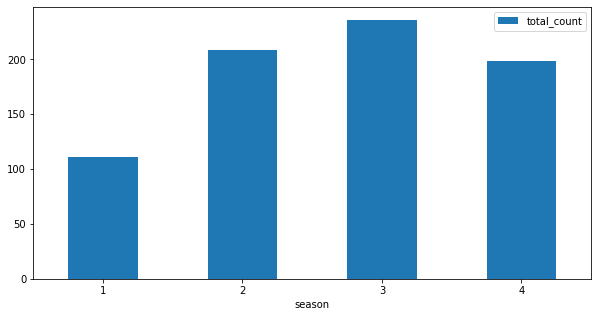

In [67]:
#Agrupando o dado por estação e mostrando apenas a coluna com o total de locações
total_estacoes = df.groupby(by='season').mean()
total_estacoes = total_estacoes[['total_count']]
print(total_estacoes)

total_estacoes.plot.bar(figsize=(10,5), rot=0);

### Horário do dia com maior e menor média de locação
* hour : hora do dia (0 a 23);
* total_count.

      total_count
hour             
0       53.898072
1       33.375691
2       22.869930
3       11.727403
4        6.352941
5       19.889819
6       76.044138
7      212.064649
8      359.011004
9      219.309491
10     173.668501
11     208.143054
12     253.315934
13     253.661180
14     240.949246
15     251.233196
16     311.983562
17     461.452055
18     425.510989
19     311.523352
20     226.030220
21     172.314560
22     131.335165
23      87.831044


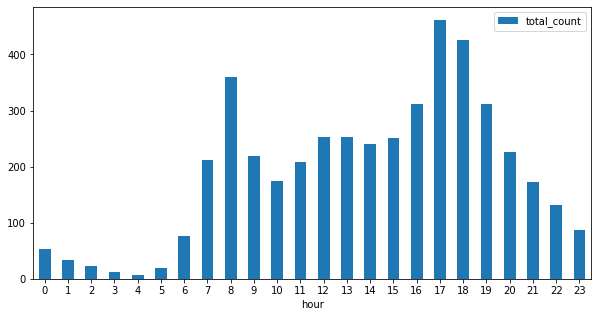

In [68]:
horas_locacao = df.groupby(by='hour').mean()
horas_locacao = horas_locacao[['total_count']]
print(horas_locacao)
horas_locacao.plot.bar(figsize=(10,5), rot=0);

### Dia da senmana e média de locação
* weekday : dia da semana (0: domingo, 1: segunda-feira, …, 6: sábado);


         total_count
weekday             
0         177.468825
1         183.744655
2         191.238891
3         191.130505
4         196.436665
5         196.135907
6         190.209793
O maior valor é: 196.43666531768514 e corresponde a total_count    4
dtype: int64


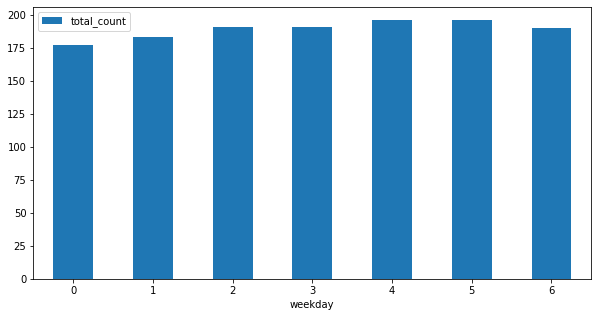

In [90]:
dia_locacao = df.groupby(by='weekday').mean()
dia_locacao = dia_locacao[['total_count']]
print(dia_locacao)
print("O maior valor é: "+ str(dia_locacao.values.max()) + " e corresponde a "+ str(dia_locacao.idxmax()))
dia_locacao.plot.bar(figsize=(10,5), rot=0);

### Análise de horário para um dia da semana específico

      total_count
hour             
0       34.557692
1       15.336538
2        7.813725
3        4.888889
4        4.968750
5       25.750000
6      107.807692
7      303.980769
8      488.326923
9      238.528846
10     131.894231
11     152.201923
12     193.903846
13     185.826923
14     170.548077
15     181.288462
16     272.961538
17     513.144231
18     494.029126
19     357.504854
20     256.660194
21     194.669903
22     143.689320
23      83.737864


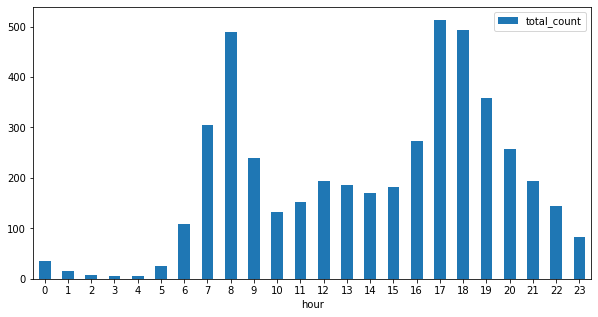

In [100]:
#Usando a indexação Booleana
#Às quartas-feiras (weekday = 3), qual o horário do dia contém a maior média de locações de bicicletas?

condicao_quarta = df['weekday'] == 3
df_quarta = df[condicao_quarta]

horas_locacao = df_quarta.groupby(by='hour').mean()
horas_locacao = horas_locacao[['total_count']]
print(horas_locacao)
horas_locacao.plot.bar(figsize=(10,5), rot=0);

      total_count
hour             
0       94.304762
1       67.780952
2       50.495238
3       22.885714
4        7.657143
5        8.291262
6       21.000000
7       45.961905
8      114.476190
9      186.790476
10     263.723810
11     328.609524
12     375.380952
13     385.371429
14     381.333333
15     382.428571
16     366.142857
17     334.409524
18     292.048077
19     239.932692
20     180.865385
21     156.000000
22     139.663462
23     115.855769


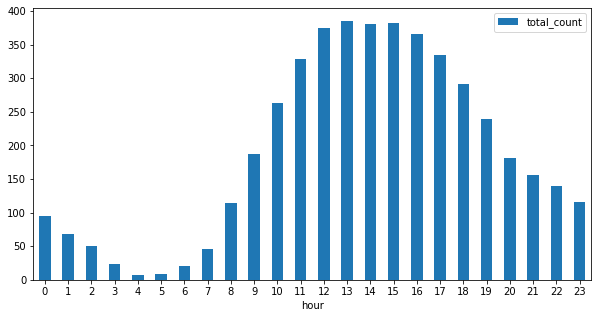

In [98]:
#Usando a indexação Booleana
#Aos sábados (weekday = 6), qual o horário do dia contém a maior média de locações de bicicletas?
condicao_sabado = df['weekday'] == 6
df_sabado = df[condicao_sabado]

horas_locacao = df_sabado.groupby(by='hour').mean()
horas_locacao = horas_locacao[['total_count']]
print(horas_locacao)
horas_locacao.plot.bar(figsize=(10,5), rot=0);